# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Половников Никита. Вариант №19

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**Регрессионная модель:** 

$$\mathbb{E}(Y|z)=f_{\theta}(z)$$

**Метод наименьших квадратов:** 
$$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$$

**Нормальные уравнения:** $$XX^\intercal\beta=XY$$

**Решение системы нормальных уравнений в регулярном случае:** $$\hat{\beta}=(XX^\intercal)^{-1}XY$$


**Оценка параметра $\sigma^2$** $$s^2 \frac{RSS(\widehat\beta)}{n-r}=\frac{SSe}{n-r}$$

**Доверительный эллипс для параметра $(\beta_0, \beta_1)$:**

**ДНО-функция:** $$\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$$

**МНК оценка** $$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$$

**Доверительный эллипс:** $$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

**F - статистика:**  $$\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import sympy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
X = [6, 6, 5, 4, 4, 4, 5, 6, 3, 5, 4, 6, 5, 5, 4, 2, 6, 5, 5, 5, 5, 7, 3, 5, 5, 4, 3, 6, 6, 5, 1, 5, 7, 3, 4, 4, 4,
     6, 4, 4, 6, 3, 3, 4, 7, 5, 6, 4, 4, 3]
Y = [10.43, 12.25, 13.36, 9.41, 11.44, 10.69, 11.44, 12.94, 11.63, 9.35, 9.94, 13.70, 11.85, 10.90, 12.66, 8.87, 10.68, 
     10.23, 9.00, 10.97, 9.67, 8.70, 10.94, 10.08, 10.64, 10.43, 10.19, 11.95, 10.36, 11.19, 10.27, 11.35, 10.97, 10.04,
     10.68, 10.42, 11.75, 12.00, 9.43, 9.82, 10.67, 11.53, 10.05, 9.34, 11.11, 10.00, 8.80, 8.99, 11.96, 9.37]

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [3]:
data = {'X': X, 'Y': Y}
data = pd.DataFrame(data)

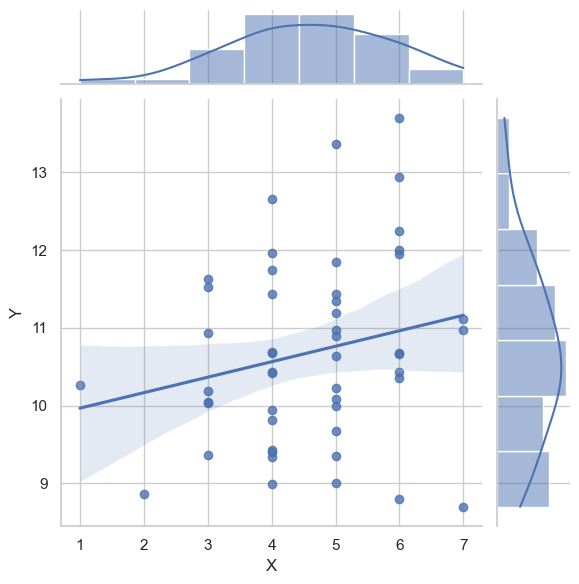

In [4]:
sns.set_theme(style='whitegrid')
sns.jointplot(x = 'X', y = 'Y', data = data, kind="reg")

**Линейная регрессионная модель имеет вид:**


$$\mathbb{E}(Y|z) = x(z)^{\intercal}\beta$$

$$Y = \beta_0 + \beta_1 X + \varepsilon$$

#### Построение МНК оценок:

In [5]:
X = np.array(data['X']).reshape(-1,1)
Y = np.array(data['Y'])

In [6]:
model = LinearRegression()
model.fit(X, Y)
b0 = model.intercept_
b1 = model.coef_

***МНК построенное при помощи модуля sklearn***

In [7]:
print('betta_0 =', model.intercept_, '\n',
      'betta_1 =', model.coef_)

betta_0 = 9.769251650770359 
 betta_1 = [0.19903644]


In [8]:
y_pred = model.predict(X)
y_pred

array([10.96347029, 10.96347029, 10.76443385, 10.56539741, 10.56539741,
       10.56539741, 10.76443385, 10.96347029, 10.36636097, 10.76443385,
       10.56539741, 10.96347029, 10.76443385, 10.76443385, 10.56539741,
       10.16732453, 10.96347029, 10.76443385, 10.76443385, 10.76443385,
       10.76443385, 11.16250673, 10.36636097, 10.76443385, 10.76443385,
       10.56539741, 10.36636097, 10.96347029, 10.96347029, 10.76443385,
        9.96828809, 10.76443385, 11.16250673, 10.36636097, 10.56539741,
       10.56539741, 10.56539741, 10.96347029, 10.56539741, 10.56539741,
       10.96347029, 10.36636097, 10.36636097, 10.56539741, 11.16250673,
       10.76443385, 10.96347029, 10.56539741, 10.56539741, 10.36636097])

In [9]:
b = np.array([b0, b1[0]]).reshape(-1,1)
b

array([[9.76925165],
       [0.19903644]])

In [10]:
X_1 = np.vstack([np.ones(len(X)),X.transpose()])

In [11]:
RSS = np.sum((Y - y_pred)**2)
RSS

65.7269720714111

In [12]:
XY = np.matmul(X_1, Y)
print(XY)

[ 534.44 2485.39]


In [13]:
XXT = np.matmul(X_1, X_1.T)
print(XXT)

[[  50.  231.]
 [ 231. 1149.]]


In [14]:
XXT1 = np.linalg.inv(XXT)
print(XXT1)

[[ 0.2809978  -0.05649303]
 [-0.05649303  0.01222793]]


***МНК найденое из системы нормальных уравнений.***

In [15]:
XXT1XY = np.matmul(XXT1, XY)
print('betta с крышкой = ', XXT1XY)

betta с крышкой =  [9.76925165 0.19903644]


**Видно, что вычисления оказались верными, т.к. сошлись с результатом модели sklearn-a.**


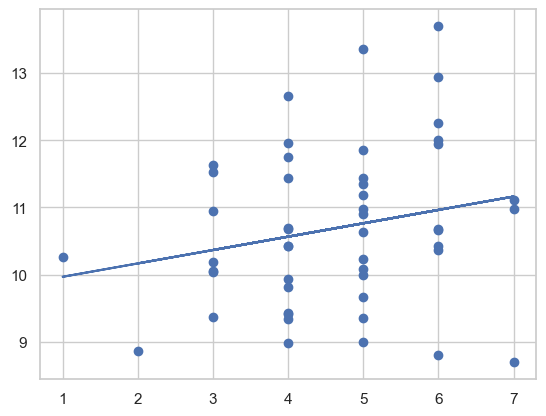

In [16]:
y_pred = model.predict(X)
plt.plot(X, y_pred)
plt.scatter(X,Y)

**Модель плохо описывает зависимость в данных.**

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 1.1$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.05$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

**Несмещеннная оценка дисперсии**

In [17]:
S2 = RSS/(50-np.linalg.matrix_rank(X_1))
S2

1.3693119181543978

In [18]:
div = Y - y_pred
div = np.sort(div)


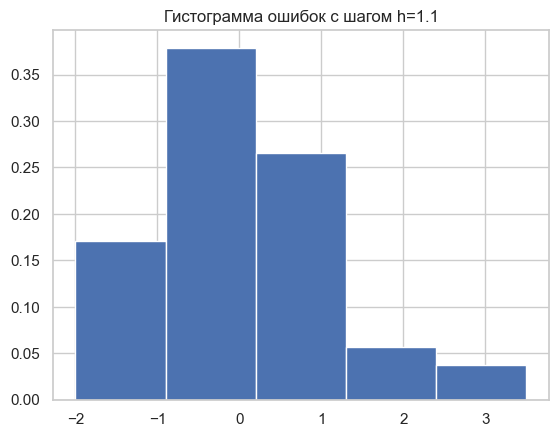

In [61]:
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(div)) * 10, int(max(div)) * 10 + 20, int(1.1 * 10))]
ax.hist(div, bins = bins, density= True)
plt.title("Гистограмма ошибок с шагом h=1.1")
plt.show()

Основная гипотеза: $H_0 : F \equiv \mathcal{N}(0, S^2)$

Альтернативная гипотеза: $H_A : \exists x : F(x) \neq F_{\theta}(x)$

Вычислим статистику $\chi^2 :$ 

In [20]:
n_i = 10
intervals = [[-2.5,-1.080], [-1.081,-0.310], [-0.311,0.125], [0.126,1.040], [1.041, 2.74]]
x_mean = [(intervals[0][0]+intervals[0][1])/2, (intervals[1][0]+intervals[1][1])/2, (intervals[2][0]+intervals[2][1])/2,
         (intervals[3][0]+intervals[3][1])/2, (intervals[4][0]+intervals[4][1])/2] # середины интервалов
xn = np.multiply(x_mean,n_i)
x2n = np.multiply(np.square(x_mean),n_i)
xn_mean = np.sum(xn)/50
x2n_mean = np.sum(x2n)/50
var = x2n_mean - xn_mean**2
s = np.sqrt(var*(50/49))

Lapl_intervals = [[-np.inf,(intervals[0][1]-xn_mean)/s],[(intervals[1][0]-xn_mean)/s,(intervals[1][1]-xn_mean)/s],
                  [(intervals[2][0]-xn_mean)/s,(intervals[2][1]-xn_mean)/s],
                  [(intervals[3][0]-xn_mean)/s,(intervals[3][1]-xn_mean)/s],
                  [(intervals[4][0]-xn_mean)/s, np.inf]]

In [21]:
Lapl_intervals

[[-inf, -0.8498742137964845],
 [-0.8506767390219768, -0.23192979016731258],
 [-0.232732315392805, 0.11716868292189486],
 [0.11797120814738729, 0.8514792642474692],
 [0.8522817894729615, inf]]

In [22]:
z_i = [[-0.5, -0.2996],[-0.2996, -0.0871],[-0.0871, 0.0438],[0.0438, 0.3023],[0.3023 ,0.5]]
p_i = ([z_i[0][1] - z_i[0][0], z_i[1][1] -z_i [1][0], z_i[2][1] - z_i[2][0], z_i[3][1] - z_i[3][0], z_i[4][1] - z_i[4][0]])
p_i

[0.20040000000000002, 0.21249999999999997, 0.1309, 0.2585, 0.1977]

In [23]:
p_i = np.round(np.multiply(p_i,50),3)
p_i

array([10.02 , 10.625,  6.545, 12.925,  9.885])

In [24]:
chi = 0
for i in range(len(p_i)):
    chi += (10-p_i[i])**2/p_i[i]
print('хи практический:', chi)
print("хи теоретический:", sp.stats.chi2.ppf(1 - 0.05, df = 5-3))

хи практический: 2.523925227134662
хи теоретический: 5.991464547107979


Из таблицы: $\chi_{k-1-1, \alpha_1}^2 = \chi_{2, 0.05}^2 =  5.99 $

Получили: $\chi^2 = 2.52$

#### Так как $\chi^2 < \chi_{2, 0.1}^2$ , то принимаем гипотезу

***Оценим расстояние оценки до класса нормальных распределений по Колмогорову.***

In [25]:
kolmagorov_stat, p_val = sps.kstest(div, 'norm')
print(kolmagorov_stat, p_val)

0.0895141121809957 0.7846820604402077


**Критическое значение** $ = 0.784 $

**Статистика Колмогорова** $ = 0.089$

#### Так как  $ 0.784 < 0.089 $ , то принимаем гипотезу

***Визуально оценим расстояние полученой оценки до класса нормальных распределений по Колмагорову.***

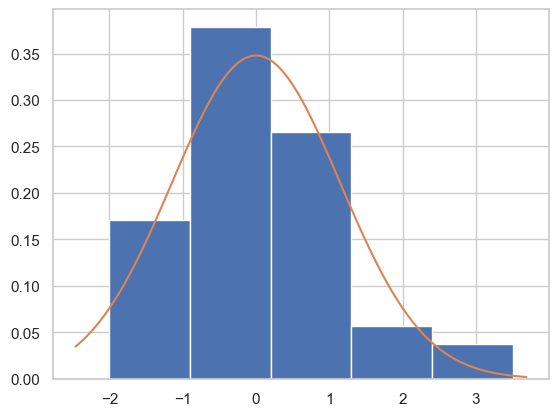

In [26]:
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(div)) * 10, int(max(div)) * 10 + 20, int(1.1 * 10))]
ax.hist(div, bins = bins, density= True)
plt.plot(np.arange(min(div), max(div) + 1, 0.05), sps.norm.pdf(np.arange(min(div), max(div) + 1, 0.05), div.mean(), div.std()))
plt.show()

Как можно заметить, ошибки имеют распределение близкое к нормальному.

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

**Доверительный  интервал для  параметра $\beta_0$:**

**ДНО-функция: $\psi = C^\intercal \beta = \beta_0$**

$C = (1, 0)^\intercal$

**МНК оценка** равна $\hat{\psi} = \hat{\beta}_0$


In [27]:
r = np.linalg.matrix_rank(X_1)
x_alpha = sp.stats.t.ppf(1 - 0.05/2, df = 50 - r)
C = np.matrix([[1], [0]])
b_psi = np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1, X_1.T))), C)
print("left = ", b[0] - x_alpha * np.sqrt(S2) * np.sqrt(b_psi))
print("right = ", b[0] + x_alpha * np.sqrt(S2) * np.sqrt(b_psi))

left =  [[8.52205241]]
right =  [[11.01645089]]


**Таким образом, ДИ уровня значимости $\alpha = 0.05$ для $\beta_0 = 9.769$:**

$$\left[8.522, 11.016\right] \ni \beta_0$$

$\,$

**Доверительный  интервал для  параметра $\beta_1$:**

**ДНО-функция: $\psi = C^\intercal \beta = \beta_1$**

$C = (0, 1)^\intercal$

**МНК оценка** равна $\hat{\psi} = \hat{\beta}_1$


In [28]:
r = np.linalg.matrix_rank(X_1)
x_alpha = sp.stats.t.ppf(1 - 0.05/2, df = 50 - r)
C = np.matrix([[0], [1]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1, X_1.T))), C))
print("left = ", b[1] - x_alpha * np.sqrt(S2) * np.sqrt(b_psi))
print("right = ", b[1] + x_alpha * np.sqrt(S2) * np.sqrt(b_psi))

left =  [-0.06113572]
right =  [0.4592086]


**Таким образом, ДИ уровня значимости $\alpha = 0.05$ для $\beta_1 = 0.199$:**

$$\left[-0.061, 0.45\right] \ni \beta_1$$

$ \, $

Для положительно определённой симметричной матрицы процедура нахождения собственных значений является не чем иным, как поиском длин полуосей соответствующего эллипса.

In [29]:
b_1_arr = np.arange(50.)
b_1_arr = np.full_like(b_1_arr, b[1])
cov = np.cov(np.column_stack((div, b_1_arr)))

e_val, e_vec = np.linalg.eig(cov)

ax_0 = np.sqrt(e_val[0] * sps.chi2.ppf(1 - 0.05/2, 2))
ax_1 = np.sqrt(e_val[1] * sps.chi2.ppf(1 -  0.05/2, 2))

print(ax_0, ax_1)

(15.803977911263793+0j) 1.052773277394894e-07j


Таким образом **полуоси доверительного эллипса** равны:
$$ 15.8 - \textbf{большая полуось}$$
$$ 0.105*10^{-6} - \textbf{малая полуось}$$

**Уравнение доверительного эллипса:**

$$ \frac{x^2}{15.8} + \frac{y^2}{0.105*10^{-6}} = 1$$

### 4.Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

$Основная \, гипотеза: H_0 : \psi = 0$

$ F - статистика: \mathbb{F} = \frac{\frac{SS_H}{q}}{\frac{SSe}{n-r}}$

$\Large s^2 = \frac{SSe}{n-r}$

$ В \, итоге:\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $

In [30]:
b_h = np.array([Y.mean(),0])

In [31]:
r = np.linalg.matrix_rank(X_1)

F = (np.sum((Y - np.matmul(X_1.T, b_h))**2) -RSS)/(S2 * 2)
F_crit = sps.f.ppf(1 - 0.05, r, 50 - r)
print(F, F_crit)

1.1829868292373946 3.1907273359284987


**F - статистика =**  $1.182$ 

**Граница критической области** $x_\alpha$ **=** $3.191$

Так как $ F_{стат} < x_\alpha$ , то принимаем гипотезу

### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров сдвига $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графиески полученную регрессионную зависимость.

In [32]:
X_1_1 = np.vstack([np.ones(len(X)), np.ones(len(X)),X.transpose()])

In [33]:
X_1_1 = X_1_1.astype('int')

In [34]:
X_1_1[1], X_1_1[2] = X_1_1[2], X_1_1[1]

In [35]:
X_1_1[2] = X_1_1[2]* X_1_1[2]


***МНК полученное при помощи модуля sklearn.***

In [36]:
model_1 = LinearRegression()
model_1.fit(X_1_1.T, Y)
b0_1= model_1.intercept_
b1_1 = model_1.coef_
print('betta_0 =', model_1.intercept_, '\n',
      'betta_1 =', model_1.coef_)

betta_0 = 9.08668829831067 
 betta_1 = [ 0.          0.53585582 -0.03801315]


In [37]:
b_1 = [9.087,  0.536, -0.038]

In [38]:
y_pred_1 = model_1.predict(X_1_1.T)

In [39]:
XY_1 = np.matmul(X_1_1, Y)
print(XY)

[ 534.44 2485.39]


In [40]:
XXT_1 = np.matmul(X_1_1, X_1_1.T)
print(XXT_1)

[[   50   231  1149]
 [  231  1149  6033]
 [ 1149  6033 33081]]


In [41]:
np.linalg.det(XXT_1)

1048463.999999992

In [42]:
XXT1_1 = np.linalg.inv(XXT_1)
print(XXT1_1)

[[ 1.53842192 -0.67698462  0.07002816]
 [-0.67698462  0.31841723 -0.03455627]
 [ 0.07002816 -0.03455627  0.00389999]]


***МНК полученное решением системы номальных уравнений***

In [43]:
XXT1XY_1 = np.matmul(XXT1_1, XY_1)
print('betta с крышкой = ', XXT1XY_1)

betta с крышкой =  [ 9.0866883   0.53585582 -0.03801315]


In [44]:
x = np.arange(0,7,0.1)
y = XXT1XY_1[0] + XXT1XY_1[1]*x + XXT1XY_1[2]*x**2

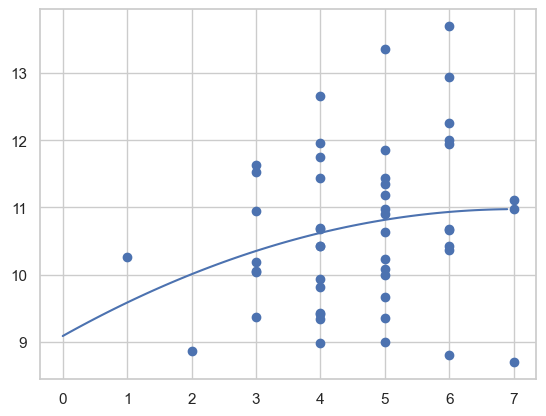

In [45]:
plt.plot(x,y)
plt.scatter(X, Y)

**Модель плохо описывает зависимость в данных.**

### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [46]:
RSS_1 = np.sum((Y - y_pred_1)**2)
RSS_1

65.35645847754431

**Несмещенная оценка дисперсии**

In [47]:
S2_1 = RSS/(50-np.linalg.matrix_rank(X_1_1))
S2_1

1.3984462142853424

In [63]:
div_1 = Y - y_pred_1

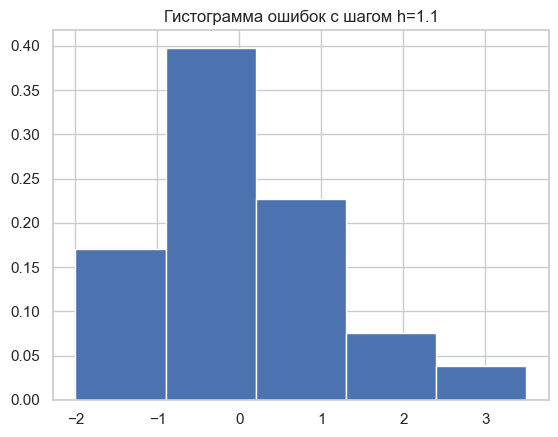

In [65]:
fig_1, ax_1 = plt.subplots()
bins_1 = [x / 10.0 for x in range(int(min(div)) * 10, int(max(div)) * 10 + 20, int(1.1 * 10))]
ax_1.hist(div_1, bins = bins_1, density= True)
plt.title("Гистограмма ошибок с шагом h=1.1")
plt.show()

***Визуально оценим расстояние полученой оценки до класса нормальных распределений по Колмагорову.***

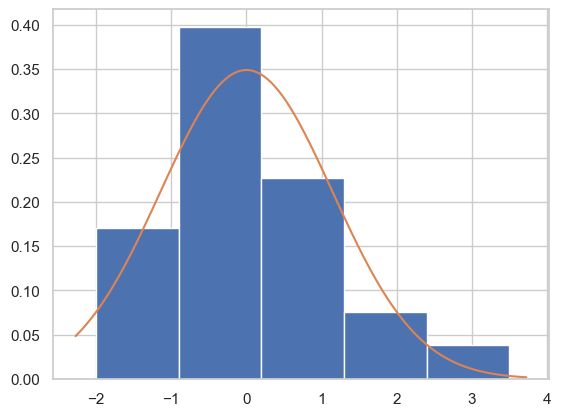

In [49]:
fig_1, ax_1 = plt.subplots()
bins_1 = [x / 10.0 for x in range(int(min(div_1)) * 10, int(max(div_1)) * 10 + 20, int(1.1 * 10))]
ax_1.hist(div_1, bins = bins_1, density= True)
plt.plot(np.arange(min(div_1), max(div_1) + 1, 0.05), sps.norm.pdf(np.arange(min(div_1), max(div_1) + 1, 0.05), div_1.mean(), div_1.std()))
plt.show()

**Как можно заметить, ошибки имеют распределение близкое к нормальному.**

In [50]:
div_1 = np.sort(div_1)

In [51]:
intervals = [[-2.28,-1.14], [-1.14,-0.3], [-0.3,0.08], [0.08,1.03], [1.03, 2.77]]
x_mean = [(intervals[0][0]+intervals[0][1])/2, (intervals[1][0]+intervals[1][1])/2, (intervals[2][0]+intervals[2][1])/2,
         (intervals[3][0]+intervals[3][1])/2, (intervals[4][0]+intervals[4][1])/2]
xn = np.multiply(x_mean,n_i)
x2n = np.multiply(np.square(x_mean),n_i)
xn_mean = np.sum(xn)/50
x2n_mean = np.sum(x2n)/50
var = x2n_mean - xn_mean**2
s = np.sqrt(var*(50/49))

Lapl_intervals = [[-np.inf,(intervals[0][1]-xn_mean)/s],[(intervals[1][0]-xn_mean)/s,(intervals[1][1]-xn_mean)/s],
                  [(intervals[2][0]-xn_mean)/s,(intervals[2][1]-xn_mean)/s],
                  [(intervals[3][0]-xn_mean)/s,(intervals[3][1]-xn_mean)/s],
                  [(intervals[4][0]-xn_mean)/s, np.inf]]

In [52]:
Lapl_intervals

[[-inf, -0.9156073873209828],
 [-0.9156073873209828, -0.23073632289567067],
 [-0.23073632289567067, 0.0790863014872087],
 [0.0790863014872087, 0.8536428624444072],
 [0.8536428624444072, inf]]

In [53]:
z_i_1 = [[-0.5, -0.3186],[-0.3186, -0.0910],[-0.0910, 0.0279],[0.0279, 0.3023],[0.3023 ,0.5]]
p_i_1 = ([z_i_1[0][1] - z_i_1[0][0], z_i_1[1][1] - z_i_1[1][0], z_i_1[2][1] 
      - z_i_1[2][0], z_i_1[3][1] - z_i_1[3][0], z_i_1[4][1] - z_i_1[4][0]])
p_i_1

[0.1814, 0.2276, 0.1189, 0.27440000000000003, 0.1977]

In [54]:
p_i_1 = np.round(np.multiply(p_i_1,50),3)
p_i_1

array([ 9.07 , 11.38 ,  5.945, 13.72 ,  9.885])

In [55]:
chi_1 = 0
for i in range(len(p_i_1)):
    chi_1 += (10-p_i_1[i])**2/p_i_1[i]
print('хи практический:', chi_1)
print('хи теоретический:', sp.stats.chi2.ppf(1 - 0.05, df = 5-3))

хи практический: 4.038530032632423
хи теоретический: 5.991464547107979


Из таблицы: $\chi_{k-1-1, \alpha_1}^2 = \chi_{2, 0.05}^2 =  5.99 $

Получили: $\chi^2 = 4.04$

#### Так как $\chi^2 < \chi_{2, 0.1}^2$ , то принимаем гипотезу

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$.

**Доверительный  интервал для  параметра $\beta_0$:**

**ДНО-функция: $\psi = C^\intercal \beta = \beta_0$**

$C = (1, 0, 0)^\intercal$

**МНК оценка** равна $\hat{\psi} = \hat{\beta}_0$


In [56]:
r = np.linalg.matrix_rank(X_1_1)
x_alpha = sp.stats.t.ppf(1 - 0.05/2, df = 50 - r)
C = np.matrix([[1], [0], [0]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C))
print('left = ', XXT1XY_1[0] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print('right = ', XXT1XY_1[0] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))

left =  6.135937217653057
right =  12.037439378967699


**Таким образом, ДИ уровня значимости $\alpha = 0.05$ для $\beta_0 = 9.087$:**

$$\left[6.136, 12.037\right] \ni \beta_0$$

$\,$

**Доверительный  интервал для  параметра $\beta_1$:**

**ДНО-функция: $\psi = C^\intercal \beta = \beta_1$**

$C = (0, 1, 0)^\intercal$
 
**МНК оценка** равна $\hat{\psi} = \hat{\beta}_1$


In [57]:
r = np.linalg.matrix_rank(X_1_1)
x_alpha = sp.stats.t.ppf(1 - 0.05/2, df = 50 - r)
C = np.matrix([[0], [1], [0]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C))
print("left = ", XXT1XY_1[1] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print("right = ", XXT1XY_1[1] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))

left =  -0.8065787343411759
right =  1.8782903810931404


**Таким образом, ДИ уровня значимости $\alpha = 0.05$ для $\beta_1 = 0.536$:**

$$\left[-0.807, 1.878\right] \ni \beta_0$$

$\,$

**Доверительный  интервал для  параметра $\beta_2$:**

**ДНО-функция: $\psi = C^\intercal \beta = \beta_2$**

$C = (0, 0, 1)^\intercal$

Тогда **МНК оценка** равна $\hat{\psi} = \hat{\beta}_2$

In [58]:
r = np.linalg.matrix_rank(X_1_1)
x_alpha = sp.stats.t.ppf(1 - 0.05/2, df = 50 - r)
C = np.matrix([[0], [0], [1]])
b_psi = np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C)
print('left =', XXT1XY_1[2] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print('right =', XXT1XY_1[2] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))

left = [[-0.18658162]]
right = [[0.11055532]]


**Таким образом, ДИ уровня значимости $\alpha = 0.05$ для $\beta_2 = -0.038$:**

$$\left[-0.187,  0.111\right] \ni \beta_0$$

$\,$

***Для положительно определённой симметричной матрицы процедура нахождения собственных значений является не чем иным, как поиском длин полуосей соответствующего эллипса.***


$b_{\psi1} = C^\intercal(XX^\intercal)^{-1}C$ - матрица ковариаций

In [59]:
C_1 = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b_psi_1 = np.matmul(np.matmul(C_1.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C_1)
b_1_arr_1 = np.arange(50.)
b_1_arr_1 = np.full_like(b_1_arr_1, b_1[1])

cov = b_psi_1
e_val, e_vec = np.linalg.eig(cov)

ax_0 = np.sqrt(e_val[0] * sps.chi2.ppf(1 - 0.05/2, 2))
ax_1 = np.sqrt(e_val[1] * sps.chi2.ppf(1 -  0.05/2, 2))
ax_2 = np.sqrt(e_val[2] * sps.chi2.ppf(1 -  0.05/2, 2))

print(ax_0, ax_1, ax_2)

3.6874385152201623 0.36147803760205754 0.014682608664540363


**Уравнение доверительного эллипсоида:**

$$ \frac{x^2}{3.687} + \frac{y^2}{0.361} + \frac{z^2}{ 0.015} = 1$$

### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

$Основная \, гипотеза: H_0 : \psi = 0$

$ F - статистика: \mathbb{F} = \frac{\frac{SS_H}{q}}{\frac{SSe}{n-r}}$

$\Large s^2 = \frac{SSe}{n-r}$

$ В \, итоге:\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $

In [60]:
b_h = np.array([ 9.0866883, 0.53585582, 0])
F = np.sum((b_1[0] + b_1[1] * X + b_1[2] * X ** 2 - np.mean(Y)) ** 2)/(S2_1 * 3)
F_crit = sps.f.ppf(1 - 0.05, r, 50 - r)
print(F, F_crit)

0.8625257477514643 2.80235517609617


**F - статистика =**  $0.863$ 

**Граница критической области** $x_\alpha$ **=** $2.802$

Так как $ F_{стат} < x_\alpha$ , то ***принимаем гипотезу***

## Выводы

В ходе выполнения практической работы был проведен регрессионный анализ. Построены линейные модели, произведена оценка параметров и исследование их значимости, проверены гипотезы о независимости и линейной регрессионной зависимости, построены оценки нормальности ошибок, доверительные интервалы и доверительный эллипс и эллипсоид. Было оценено расстояние полученных оценок до класса нормальных распределений по Колмогорову. Сформулирована гипотеза о независимости переменной Y от переменной X.